In [1]:
cd /orange/adamginsburg/w51/2017.1.00293.S/uvdata/

/orange/adamginsburg/w51/2017.1.00293.S/uvdata


In [10]:
ls *e2w*.fits

w51e2w_CS2-1_cutout.fits
w51e2w_H42a_cutout.fits
w51e2w_SiOv=2J=2-1_cutout.fits
W51w51e2w_only.B3.robust0.5.spw0.clarkclean10000.image.pbcor.fits
W51w51e2w_only.B3.robust0.5.spw0.clarkclean10000.image.pbcor.medsub.fits
W51w51e2w_only.B3.robust0.5.spw0.clarkclean10000.medsub.max.spectrum.fits
W51w51e2w_only.B3.robust0.5.spw0.clarkclean10000.model.fits
W51w51e2w_only.B3.robust0.5.spw0.clarkclean10000.pb.fits
W51w51e2w_only.B3.robust0.5.spw0.clarkclean10000.residual.fits
W51w51e2w_only.B3.robust0.5.spw1.clarkclean10000.image.pbcor.fits
W51w51e2w_only.B3.robust0.5.spw1.clarkclean10000.image.pbcor.medsub.fits
W51w51e2w_only.B3.robust0.5.spw1.clarkclean10000.medsub.max.spectrum.fits
W51w51e2w_only.B3.robust0.5.spw1.clarkclean10000.model.fits
W51w51e2w_only.B3.robust0.5.spw1.clarkclean10000.pb.fits
W51w51e2w_only.B3.robust0.5.spw1.clarkclean10000.residual.fits
W51w51e2w_only.B3.robust0.5.spw2.clarkclean10000.image.pbcor.fits
W51w51e2w_only.B3.robust0.5.spw2.clarkclean10000.image.pbcor.medsub.

In [20]:
import pyspeckit
from spectral_cube import SpectralCube
from astropy import units as u

In [16]:
cube = SpectralCube.read('W51w51e2w_only.B3.robust0.5.spw0.clarkclean10000.image.pbcor.fits')
cube.beam_threshold=1e5
yy,xx = np.unravel_index(cube.max(axis=0).argmax(), cube.shape[1:])

This function (<function BaseSpectralCube.max at 0x2b5844d97378>) requires loading the entire cube into memory and may therefore be slow.
Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
Arithmetic beam averaging is being performed.  This is not a mathematically robust operation, but is being permitted because the beams differ by <100000.0


In [17]:
sp = pyspeckit.Spectrum(xarr=cube.spectral_axis, data=cube[:,yy,xx])

In [21]:
exclude = (cube[:,yy,xx] > 0.09*u.Jy/u.beam) | (cube[:,yy,xx] < 0.07*u.Jy/u.beam)

support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


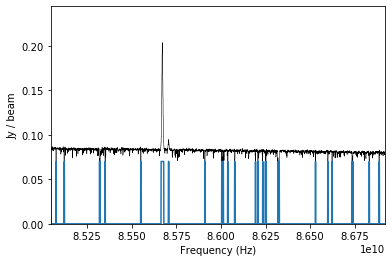

In [23]:
sp.plotter()
sp.plotter.axis.plot(sp.xarr, exclude*0.07)

In [35]:
import glob

In [44]:
    spwthr = {0: (0.075, 0.0875),
              1: (0.068, 0.076),
              2: (0.0575, 0.064),
              3: (0.058, 0.065),          
             }

This function (<function BaseSpectralCube.max at 0x2b5844d97378>) requires loading the entire cube into memory and may therefore be slow.
Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
Arithmetic beam averaging is being performed.  This is not a mathematically robust operation, but is being permitted because the beams differ by <100000.0
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
This function (<function BaseSpectralCube.max at 0x2b5844d97378>) requires loading the entire cube into memory and may therefore be slow.
Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
Arithmetic beam averaging is being performed.  This is not a math

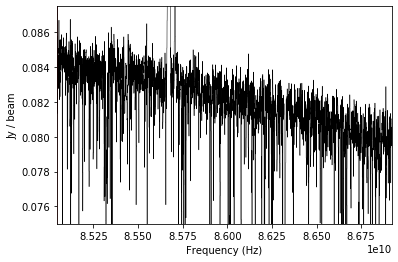

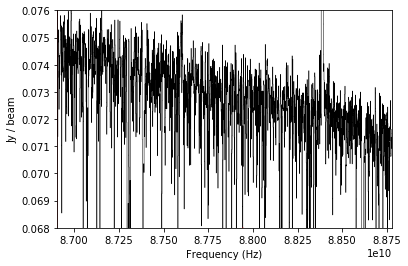

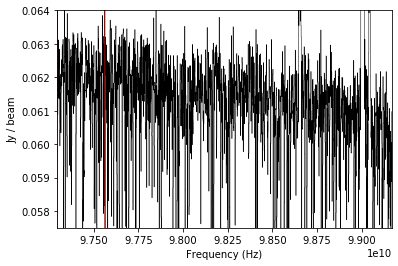

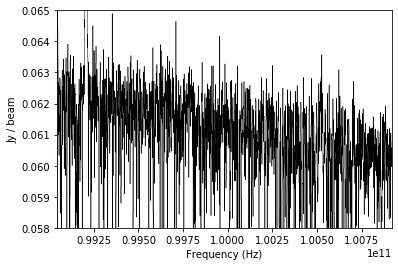

In [48]:
for spw in spwthr:
    fn = (f'W51w51e2w_only.B3.robust0.5.spw{spw}.clarkclean10000.image.pbcor.fits')
    cube = SpectralCube.read(fn)
    cube.beam_threshold=1e5
    yy,xx = np.unravel_index(cube.max(axis=0).argmax(), cube.shape[1:])
    sp = pyspeckit.Spectrum(xarr=cube.spectral_axis, data=cube[:,yy,xx])
    exclude = (cube[:,yy,xx] > spwthr[spw][1]*u.Jy/u.beam) | (cube[:,yy,xx] < spwthr[spw][0]*u.Jy/u.beam)
    sp.plotter()
    #sp.plotter.axis.plot(sp.xarr, exclude*spwthr[spw][0], alpha=0.5)
    exnan = np.where(~exclude, np.nan, sp.data)
    sp.plotter.axis.plot(sp.xarr, exnan, alpha=0.5, color='r')
    sp.plotter.axis.set_ylim(*spwthr[spw])

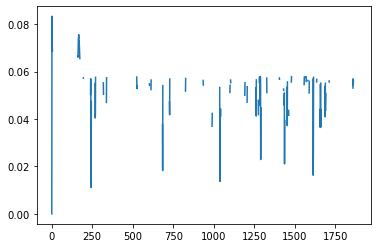

In [51]:
import pylab as pl
pl.plot(exnan)

In [24]:
include = ~exclude

In [25]:
import scipy.ndimage

In [28]:
labels, nlabels = scipy.ndimage.label(include)

In [58]:
spwmap = {0:(0,4,8,12,16),
          1:(1,5,9,13,17),
          2:(2,6,10,14,18),
          3:(3,7,11,15,19)}

In [68]:
string = ""
totalbw = 0
for spw in spwthr:
    fn = (f'W51w51e2w_only.B3.robust0.5.spw{spw}.clarkclean10000.image.pbcor.fits')
    cube = SpectralCube.read(fn)
    cube.beam_threshold=1e5
    yy,xx = np.unravel_index(cube.max(axis=0).argmax(), cube.shape[1:])
    exclude = (cube[:,yy,xx] > spwthr[spw][1]*u.Jy/u.beam) | (cube[:,yy,xx] < spwthr[spw][0]*u.Jy/u.beam)
    include = ~exclude
    labels, nlabels = scipy.ndimage.label(include)
    
    #spwr = ",".join(map(str, spwmap[spw]))
    
    #string += f"{spwr}:"
    substr = ""
    for labelno in range(1, nlabels+1):
        frqs = cube.spectral_axis[labels == labelno].to(u.GHz)
        fmin, fmax = frqs.min(), frqs.max()
        totalbw += (frqs.max()-frqs.min()).value
        substr += f'{fmin.value:0.4f}~{fmax.value:0.4f}GHz;'
    string += ",".join([f"{spwr}:{substr}".strip(";") for spwr in spwmap[spw]])
    string = string.strip(";") + ","
string = string.strip(";,")
print(string)
print(totalbw)

This function (<function BaseSpectralCube.max at 0x2b5844d97378>) requires loading the entire cube into memory and may therefore be slow.
Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
Arithmetic beam averaging is being performed.  This is not a mathematically robust operation, but is being permitted because the beams differ by <100000.0
This function (<function BaseSpectralCube.max at 0x2b5844d97378>) requires loading the entire cube into memory and may therefore be slow.
Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
Arithmetic beam averaging is being performed.  This is not a mathematically robust operation, but is being permitted because the beams differ by <100000.0
This function (<function BaseSpectralCube.max at 0x2b5844d97378>) requires loading the entire cube into memory and may therefore be slow.
Do not use the average beam for convolution! Use the smallest common bea

0:85.0472~85.0760GHz;85.0780~85.1214GHz;85.1239~85.1688GHz;85.1698~85.3187GHz;85.3241~85.3504GHz;85.3529~85.3548GHz;85.3558~85.5501GHz;85.5531~85.6634GHz;85.6810~85.7035GHz;85.7108~85.7269GHz;85.7279~85.7450GHz;85.7460~85.7557GHz;85.7572~85.7635GHz;85.7645~85.9017GHz;85.9032~85.9086GHz;85.9115~85.9588GHz;85.9598~86.0033GHz;86.0052~86.0101GHz;86.0121~86.0121GHz;86.0145~86.0170GHz;86.0179~86.0370GHz;86.0399~86.0760GHz;86.0790~86.1381GHz;86.1390~86.1556GHz;86.1566~86.1923GHz;86.1942~86.2059GHz;86.2084~86.2093GHz;86.2103~86.2328GHz;86.2347~86.2479GHz;86.2504~86.2508GHz;86.2528~86.3075GHz;86.3085~86.3182GHz;86.3270~86.3690GHz;86.3705~86.4554GHz;86.4569~86.5282GHz;86.5301~86.5975GHz;86.6005~86.6210GHz;86.6234~86.6385GHz;86.6395~86.6429GHz;86.6439~86.6512GHz;86.6522~86.6630GHz;86.6639~86.6693GHz;86.6703~86.7333GHz;86.7362~86.7367GHz;86.7391~86.7636GHz;86.7645~86.8021GHz;86.8041~86.8114GHz;86.8124~86.8290GHz;86.8319~86.8490GHz;86.8505~86.8846GHz;86.8876~86.9208GHz,4:85.0472~85.0760GHz;85.0780~

In [61]:
string = ""
totalbw = 0
for spw in spwthr:
    fn = (f'W51w51e2w_only.B3.robust0.5.spw{spw}.clarkclean10000.image.pbcor.fits')
    cube = SpectralCube.read(fn)
    cube.beam_threshold=1e5
    yy,xx = np.unravel_index(cube.max(axis=0).argmax(), cube.shape[1:])
    exclude = (cube[:,yy,xx] > spwthr[spw][1]*u.Jy/u.beam) | (cube[:,yy,xx] < spwthr[spw][0]*u.Jy/u.beam)
    include = ~exclude
    labels, nlabels = scipy.ndimage.label(exclude)
    
    spwr = ",".join(map(str, spwmap[spw]))
    
    string += f"{spwr}:"
    for labelno in range(1, nlabels+1):
        frqs = cube.spectral_axis[labels == labelno].to(u.GHz)
        fmin, fmax = frqs.min(), frqs.max()
        totalbw += (frqs.max()-frqs.min()).value
        string += f'{fmin.value}~{fmax.value}GHz;'
    string = string.strip(";") + ","
string = string.strip(";,")
print(string)
print(totalbw)

This function (<function BaseSpectralCube.max at 0x2b5844d97378>) requires loading the entire cube into memory and may therefore be slow.
Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
Arithmetic beam averaging is being performed.  This is not a mathematically robust operation, but is being permitted because the beams differ by <100000.0
This function (<function BaseSpectralCube.max at 0x2b5844d97378>) requires loading the entire cube into memory and may therefore be slow.
Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
Arithmetic beam averaging is being performed.  This is not a mathematically robust operation, but is being permitted because the beams differ by <100000.0
This function (<function BaseSpectralCube.max at 0x2b5844d97378>) requires loading the entire cube into memory and may therefore be slow.
Do not use the average beam for convolution! Use the smallest common bea

0,4,8,12,16:85.04623348543~85.0467217757327GHz;85.07650748419763~85.07748406480304GHz;85.1219184823491~85.12338335325721GHz;85.16928264171139~85.16928264171139GHz;85.31918776464148~85.32358237736582GHz;85.35092663431723~85.35239150522534GHz;85.35532124704157~85.35532124704157GHz;85.55063736812313~85.55259052933394GHz;85.66392071835044~85.68052258864238GHz;85.70396052317216~85.7103082971073GHz;85.72739845770194~85.72739845770194GHz;85.74546519890198~85.74546519890198GHz;85.75620758556147~85.75669587586417GHz;85.76402023040472~85.76402023040472GHz;85.90220638606993~85.90269467637265GHz;85.9090424503078~85.9109956115186GHz;85.95933635148629~85.95933635148629GHz;86.00377076903234~86.00474734963775GHz;86.0106068332702~86.01158341387561GHz;86.01255999448102~86.01402486538913GHz;86.01744289750806~86.01744289750806GHz;86.03746279991893~86.03941596112973GHz;86.07652602413523~86.07847918534604GHz;86.13853889257862~86.13853889257862GHz;86.15611734347596~86.15611734347596GHz;86.19273911617876~86.1